In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import matplotlib.pyplot as plt
plt.figure
import plotly.express as px 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 6
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from sklearn import metrics




In [2]:
import pandas as pd

file_path = 'GlobalLandTemperaturesByCountry.csv'
df_cntry = pd.read_csv(file_path)


In [3]:
df_cntry_clear = df_cntry[~df_cntry['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

df_cntry_clear = df_cntry_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

# Let's average temperature for each country

countries = np.unique(df_cntry_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(df_cntry_clear[df_cntry_clear['Country'] == 
                                               country]['AverageTemperature'].mean())

data = [dict(
    type='choropleth',
    locations=countries,
    z=mean_temp,
    locationmode='country names',
    text=countries,
    marker=dict(
        line=dict(color='rgb(0,0,0)', width=1)),
    colorbar=dict(autotick=True, tickprefix='',
                  title='# Average\nTemperature,\n°C')
)]

layout = dict(
    title='Average land temperature in countries',
    geo=dict(
        showframe=False,
        showocean=True,
        oceancolor='rgb(0,255,255)',
        projection=dict(
            type='orthographic',
            rotation=dict(
                lon=60,
                lat=10),
        ),
        lonaxis=dict(
            showgrid=True,
            gridcolor='rgb(102, 102, 102)'
        ),
        lataxis=dict(
            showgrid=True,
            gridcolor='rgb(102, 102, 102)'
        )
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

In [4]:
global_temp = pd.read_csv("GlobalTemperatures.csv")

years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [5]:
continent = ['Russia', 'United States', 'Egypt','Australia', 'Brazil', 'China']
mean_temp_year_country = [ [0] * len(years[70:]) for i in range(len(continent))]
j = 0
for country in continent:
    all_temp_country = df_cntry_clear[df_cntry_clear['Country'] == country]
    i = 0
    for year in years[70:]:
        mean_temp_year_country[j][i] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i +=1
    j += 1

traces = []
colors = ['rgb(0, 255, 255)', 'rgb(255, 0, 255)', 'rgb(0, 0, 0)',
          'rgb(255, 0, 0)', 'rgb(0, 255, 0)', 'rgb(0, 0, 255)']
for i in range(len(continent)):
    traces.append(go.Scatter(
        x=years[70:],
        y=mean_temp_year_country[i],
        mode='lines',
        name=continent[i],
        line=dict(color=colors[i]),
    ))

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature on the continents',)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

In [6]:
global_temp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [7]:
global_temp.shape

(3192, 9)

In [8]:
global_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [9]:
global_temp.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [10]:
global_temp.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [11]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
global_temp['dt'][0].split('-')[0]


'1750'

In [13]:
def fetch_year(date):
    return date.split('-')[0]

In [14]:
global_temp['years']=global_temp['dt'].apply(fetch_year)

In [15]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [16]:
data=global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()

In [17]:
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250


In [18]:
data['Uncertainity_top']= data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['Uncertainity_bottom']= data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']

In [19]:
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainity_top,Uncertainity_bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [20]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'Uncertainity_top', 'Uncertainity_bottom'],
      dtype='object')

In [21]:
fig = px.line(data,x='years',y=['LandAverageTemperature','Uncertainity_top', 'Uncertainity_bottom'],title='Average land temperature in World')
fig.show()

In [22]:
global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp['month'] = global_temp['dt'].dt.month
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


In [23]:
def get_season(month):
    if month>=3 and month<=5:
        return 'spring'
    elif month>=6 and month<=8:
        return 'summer'
    elif month>=9 and month<=11:
        return 'autumn'
    else:
        return 'winter'

In [24]:
global_temp['season']=global_temp['month'].apply(get_season)
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,spring
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,spring
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,spring


In [25]:
years=global_temp['years'].unique()

In [26]:
spring_temp = []
summer_temp = []
autumn_temp = []
winter_temp = []
for year in years:
    current_df=global_temp[global_temp['years'] == year]
    spring_temp.append(current_df[current_df['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temp.append(current_df[current_df['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temp.append(current_df[current_df['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temp.append(current_df[current_df['season'] == 'winter']['LandAverageTemperature'].mean())

In [27]:
season = pd.DataFrame()
season['year'] = years
season['spring_temp'] = spring_temp
season['summer_temp'] = summer_temp
season['autumn_temp'] = autumn_temp
season['winter_temp'] = winter_temp

season.head()

,year,spring_temp,summer_temp,autumn_temp,winter_temp
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333


In [28]:
fig=px.line(season,y=['spring_temp','summer_temp','autumn_temp','winter_temp'],title='Avg.temperature in each season')
fig.show()

In [29]:
df=pd.read_csv('GlobalLandTemperaturesByCity.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [30]:
egy=df[df['Country']=='Egypt']

In [31]:
city=['Cairo']
data2=egy[egy['City'].isin(city)]
data2

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1289707,1808-10-01,22.216,1.875,Cairo,Egypt,29.74N,31.38E
1289708,1808-11-01,17.766,2.211,Cairo,Egypt,29.74N,31.38E
1289709,1808-12-01,11.338,1.971,Cairo,Egypt,29.74N,31.38E
1289710,1809-01-01,10.337,2.911,Cairo,Egypt,29.74N,31.38E
1289711,1809-02-01,12.113,2.848,Cairo,Egypt,29.74N,31.38E
...,...,...,...,...,...,...,...
1292162,2013-05-01,27.100,0.254,Cairo,Egypt,29.74N,31.38E
1292163,2013-06-01,28.392,0.482,Cairo,Egypt,29.74N,31.38E
1292164,2013-07-01,28.217,0.874,Cairo,Egypt,29.74N,31.38E
1292165,2013-08-01,28.588,0.750,Cairo,Egypt,29.74N,31.38E


In [32]:
data2=data2[['dt','AverageTemperature']]
data2.head()

,dt,AverageTemperature
1289707,1808-10-01,22.216
1289708,1808-11-01,17.766
1289709,1808-12-01,11.338
1289710,1809-01-01,10.337
1289711,1809-02-01,12.113


In [33]:
data2.columns=['Date','Temp']
data2.head()

,Date,Temp
1289707,1808-10-01,22.216
1289708,1808-11-01,17.766
1289709,1808-12-01,11.338
1289710,1809-01-01,10.337
1289711,1809-02-01,12.113


In [34]:
data2['Date']=pd.to_datetime(data2['Date'])

In [35]:
data2.isnull().sum()

Date     0
Temp    18
dtype: int64

In [36]:
data2.dropna(inplace=True)

In [37]:
data2.shape

(2442, 2)

In [38]:
data2.set_index('Date',inplace=True)

In [39]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data2['Temp'])

In [40]:
def adfuller_test(temp):
    result=adfuller(temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [41]:
adfuller_test(data2['Temp'])

ADF Test Statistic : -5.1415446971910415
p-value : 1.1558749048916746e-05
#Lags Used : 24
Number of Observations Used : 2417
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [42]:
data2.head()


,Temp
Date,
1808-10-01,22.216
1808-11-01,17.766
1808-12-01,11.338
1809-01-01,10.337
1809-02-01,12.113


In [43]:
data2['month']=data2.index.month

In [44]:
data2['year']=data2.index.year

In [45]:
data2.head()

,Temp,month,year
Date,,,
1808-10-01,22.216,10,1808
1808-11-01,17.766,11,1808
1808-12-01,11.338,12,1808
1809-01-01,10.337,1,1809
1809-02-01,12.113,2,1809


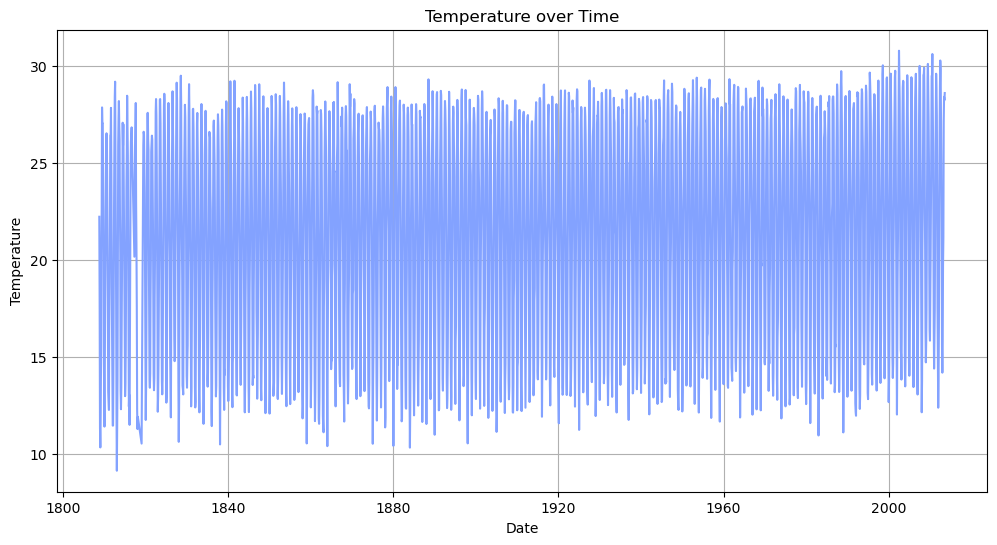

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(data2.index, data2['Temp'], color='#83A2FF')
plt.title('Temperature over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

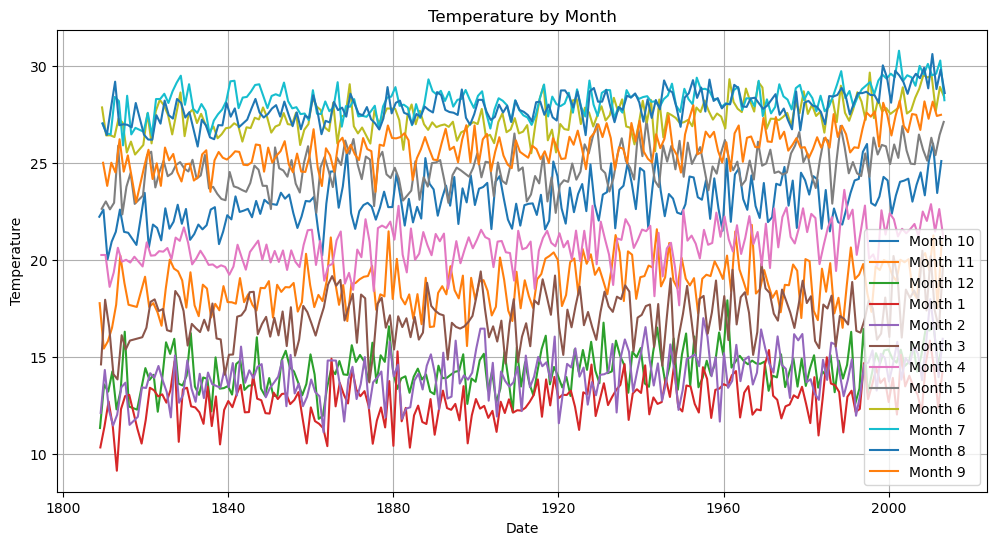

In [47]:
months = data2['month'].unique()
plt.figure(figsize=(12, 6))
for month in months:
    plt.plot(data2[data2['month'] == month].index, data2[data2['month'] == month]['Temp'], label=f'Month {month}')
plt.title('Temperature by Month')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings('ignore')

p = range(0, 6)
d = range(0, 5) 
q = range(0, 6)

pdq = itertools.product(p, d, q)

best_aic = float('inf')
best_order = None

train_size = int(len(data2) * 0.6)
train_data = data2[:train_size]
test_data = data2[train_size:]

for order in pdq:
    try:
        model = ARIMA(train_data['Temp'], order=order)
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = order
        print(f'ARIMA{order} - AIC: {aic:.2f}')
    except:
        continue

print(f'Best ARIMA model: ARIMA{best_order} - AIC: {best_aic:.2f}')

ARIMA(0, 0, 0) - AIC: 9192.16
ARIMA(0, 0, 1) - AIC: 7745.67
ARIMA(0, 0, 2) - AIC: 6890.34
ARIMA(0, 0, 3) - AIC: 6375.82
ARIMA(0, 0, 4) - AIC: 6180.52
ARIMA(0, 0, 5) - AIC: 5951.50
ARIMA(0, 1, 0) - AIC: 7447.77
ARIMA(0, 1, 1) - AIC: 6843.63
ARIMA(0, 1, 2) - AIC: 6486.60
ARIMA(0, 1, 3) - AIC: 6371.16
ARIMA(0, 1, 4) - AIC: 6275.33
ARIMA(0, 1, 5) - AIC: 6181.34
ARIMA(0, 2, 0) - AIC: 6767.40
ARIMA(0, 2, 1) - AIC: 6767.30
ARIMA(0, 2, 2) - AIC: 6662.40
ARIMA(0, 2, 3) - AIC: 6491.01
ARIMA(0, 2, 4) - AIC: 6375.25
ARIMA(0, 2, 5) - AIC: 6279.01
ARIMA(0, 3, 0) - AIC: 7841.98
ARIMA(0, 3, 1) - AIC: 6773.06
ARIMA(0, 3, 2) - AIC: 7065.85
ARIMA(0, 3, 3) - AIC: 6667.72
ARIMA(0, 3, 4) - AIC: 6661.67
ARIMA(0, 3, 5) - AIC: 6662.46
ARIMA(0, 4, 0) - AIC: 9563.82
ARIMA(0, 4, 1) - AIC: 7846.92
ARIMA(0, 4, 2) - AIC: 7607.97
ARIMA(0, 4, 3) - AIC: 7072.37
ARIMA(0, 4, 4) - AIC: 6681.34
ARIMA(0, 4, 5) - AIC: 6675.20
ARIMA(1, 0, 0) - AIC: 7341.01
ARIMA(1, 0, 1) - AIC: 6686.72
ARIMA(1, 0, 2) - AIC: 6284.76
ARIMA(1, 0

In [50]:
train_size = int(len(data2) * 0.8)
train_data = data2[:train_size]
test_data = data2[train_size:]

best_order = (3, 0, 2)

model = ARIMA(train_data['Temp'], order=best_order)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Temp   No. Observations:                 1953
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -3107.440
Date:                Tue, 07 May 2024   AIC                           6228.880
Time:                        20:11:32   BIC                           6267.919
Sample:                             0   HQIC                          6243.231
                               - 1953                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.0959      0.050    418.755      0.000      20.997      21.195
ar.L1          2.1816      0.021    102.439      0.000       2.140       2.223
ar.L2         -1.7787      0.037    -48.225      0.000      -1.851      -1.706
ar.L3          0.4501      0.021     21.193      0.000       0.408       0.492
ma.L1         -1.5770      0.011   -148.579      0.000      -1.598      -1.556
ma.L2          0.8393      0.009     94.122      0.000       0.822       0.857
sigma2         1.4144      0.036     39.597      0.000       1.344       1.484
===================================================================================
Ljung-Box (L1) (Q):                   2.58   Jarque-Bera (JB):               741.61
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.02
Prob(H) (two-sided):                  0.06   Kurtosis:                         6.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
forecast_steps = len(test_data)
forecast = results.forecast(steps=forecast_steps)

print("Forecasted values:")
forecast

Forecasted values:


1953    15.225858
1954    13.678343
1955    14.142492
1956    16.477663
1957    20.050052
          ...    
2437    20.039593
2438    22.714789
2439    24.952644
2440    26.154964
2441    26.001595
Name: predicted_mean, Length: 489, dtype: float64

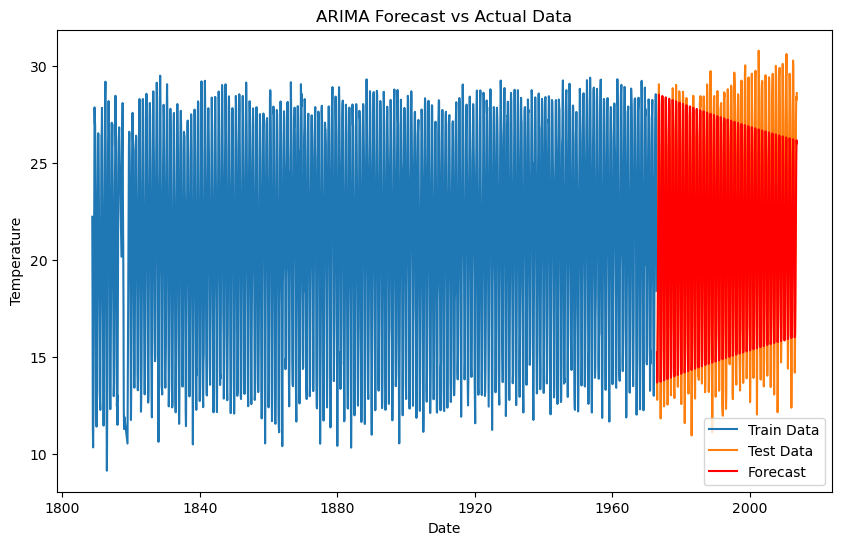

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Temp'], label='Train Data')
plt.plot(test_data.index, test_data['Temp'], label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('ARIMA Forecast vs Actual Data')
plt.legend()
plt.show()

In [53]:
mae = np.mean(np.abs(forecast - test_data['Temp']))
print("\nMean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): nan


In [54]:
print("Missing values in forecast:", forecast.isnull().sum())
print("Missing values in actual data:", test_data['Temp'].isnull().sum())

print("Length of forecast:", len(forecast))
print("Length of actual data:", len(test_data['Temp']))

print("Index of forecast:", forecast.index)
print("Index of actual data:", test_data['Temp'].index)

Missing values in forecast: 0
Missing values in actual data: 0
Length of forecast: 489
Length of actual data: 489
Index of forecast: RangeIndex(start=1953, stop=2442, step=1)
Index of actual data: DatetimeIndex(['1972-12-01', '1973-01-01', '1973-02-01', '1973-03-01',
               '1973-04-01', '1973-05-01', '1973-06-01', '1973-07-01',
               '1973-08-01', '1973-09-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=489, freq=None)


In [55]:
forecast_df = pd.DataFrame(forecast, index=test_data.index)

forecast_aligned = forecast_df.reindex(test_data.index)

mae = np.mean(np.abs(forecast_aligned.squeeze() - test_data['Temp']))
print("\nMean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): nan


In [56]:
print("NaN values in forecast:", forecast_aligned.isnull().sum())
print("NaN values in actual data:", test_data.isnull().sum())

NaN values in forecast: predicted_mean    489
dtype: int64
NaN values in actual data: Temp     0
month    0
year     0
dtype: int64


In [57]:
print("Forecast data:\n", forecast_aligned)
print("\nActual data:\n", test_data)

Forecast data:
             predicted_mean
Date                      
1972-12-01             NaN
1973-01-01             NaN
1973-02-01             NaN
1973-03-01             NaN
1973-04-01             NaN
...                    ...
2013-04-01             NaN
2013-05-01             NaN
2013-06-01             NaN
2013-07-01             NaN
2013-08-01             NaN

[489 rows x 1 columns]

Actual data:
               Temp  month  year
Date                           
1972-12-01  13.943     12  1972
1973-01-01  12.789      1  1973
1973-02-01  16.055      2  1973
1973-03-01  16.865      3  1973
1973-04-01  20.642      4  1973
...            ...    ...   ...
2013-04-01  21.146      4  2013
2013-05-01  27.100      5  2013
2013-06-01  28.392      6  2013
2013-07-01  28.217      7  2013
2013-08-01  28.588      8  2013

[489 rows x 3 columns]


In [58]:
print("NaN values in training data:", train_data.isnull().sum())

try:
    model = ARIMA(train_data['Temp'], order=best_order)
    results = model.fit()
    print("Model fitting successful.")
except Exception as e:
    print("Error during model fitting:", e)

if 'results' in locals():
    forecast_steps = len(test_data)
    forecast = results.forecast(steps=forecast_steps)
    print("\nForecast data:\n", forecast)
else:
    print("\nModel fitting failed. Cannot generate forecast.")

NaN values in training data: Temp     0
month    0
year     0
dtype: int64
Model fitting successful.

Forecast data:
 1953    15.225858
1954    13.678343
1955    14.142492
1956    16.477663
1957    20.050052
          ...    
2437    20.039593
2438    22.714789
2439    24.952644
2440    26.154964
2441    26.001595
Name: predicted_mean, Length: 489, dtype: float64


In [59]:
print("Index of forecast data:\n", forecast.index)
print("\nIndex of actual data:\n", test_data.index)

Index of forecast data:
 RangeIndex(start=1953, stop=2442, step=1)

Index of actual data:
 DatetimeIndex(['1972-12-01', '1973-01-01', '1973-02-01', '1973-03-01',
               '1973-04-01', '1973-05-01', '1973-06-01', '1973-07-01',
               '1973-08-01', '1973-09-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=489, freq=None)


In [60]:
forecast_index = pd.date_range(start=test_data.index[0], periods=len(forecast), freq='MS')

forecast.index = forecast_index

print("Index of forecast data after conversion:\n", forecast.index)

Index of forecast data after conversion:
 DatetimeIndex(['1972-12-01', '1973-01-01', '1973-02-01', '1973-03-01',
               '1973-04-01', '1973-05-01', '1973-06-01', '1973-07-01',
               '1973-08-01', '1973-09-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', length=489, freq='MS')


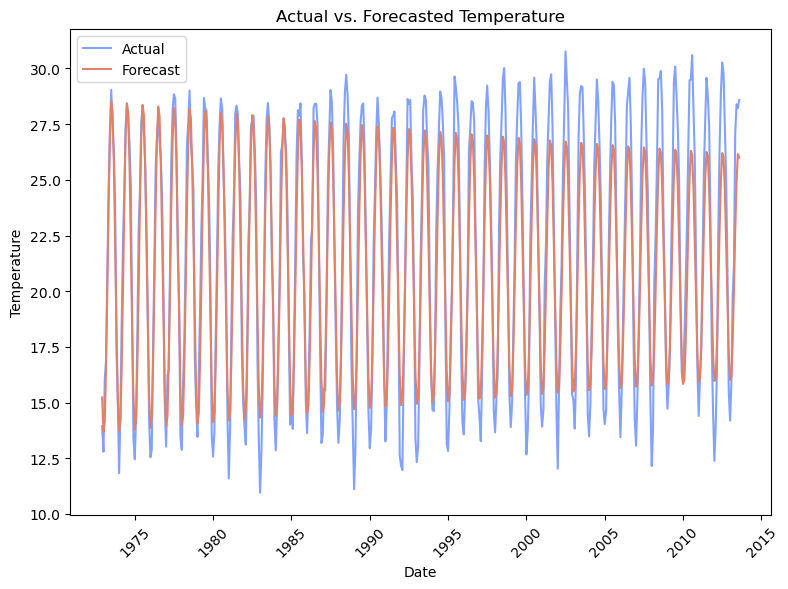

In [61]:
plt.plot(test_data.index, test_data['Temp'], color='#83A2FF', label='Actual')

plt.plot(forecast.index, forecast, color='#DF826C', label='Forecast')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Actual vs. Forecasted Temperature')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [92]:

import scipy.stats as stats
from sklearn.linear_model import LinearRegression

file_path = 'GlobalLandTemperaturesByCountry.csv'
data = pd.read_csv(file_path)

data['dt'] = pd.to_datetime(data['dt'])

data_filtered = data[data['dt'].dt.year >= 1850]
data_filtered = data_filtered.dropna(subset=['AverageTemperature'])

X = np.array(data_filtered['dt'].dt.year).reshape(-1, 1) 
y = data_filtered['AverageTemperature'].values

linear_model = LinearRegression()
linear_model.fit(X, y)

print(f"Coefficient: {linear_model.coef_[0]}")
print(f"Intercept: {linear_model.intercept_}")


Coefficient: 0.015030708269653392
Intercept: -10.629715172704234


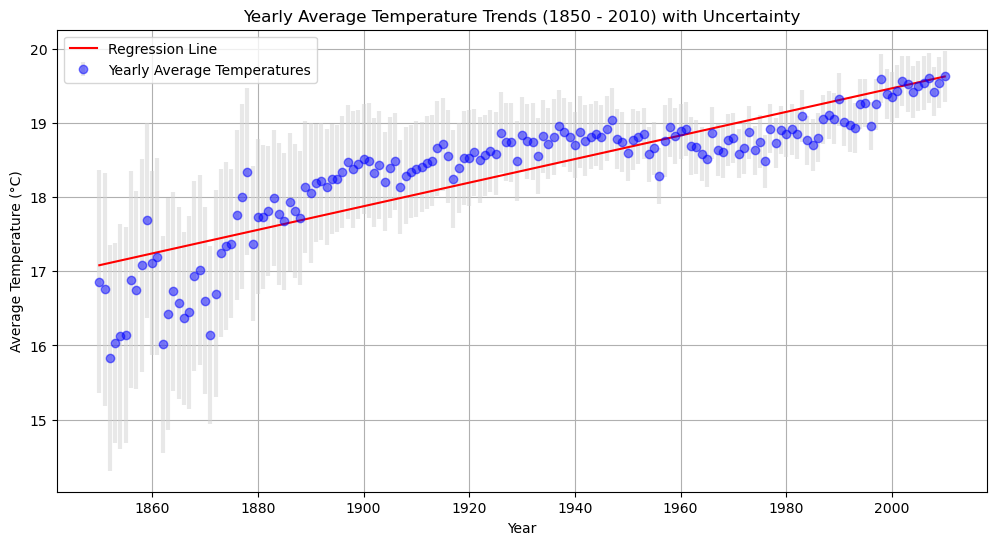

In [86]:
data_filtered = data[data['dt'].dt.year >= 1850]
data_reg = data_filtered[(data_filtered['dt'].dt.year >= 1850) & (data_filtered['dt'].dt.year <= 2010)]
data_reg = data_reg.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])

yearly_data = data_reg.groupby(data_reg['dt'].dt.year).agg({
    'AverageTemperature': 'mean',
    'AverageTemperatureUncertainty': 'mean'
}).reset_index()
yearly_data.rename(columns={'dt': 'Year', 'AverageTemperature': 'YearlyAverageTemp', 'AverageTemperatureUncertainty': 'YearlyUncertainty'}, inplace=True)

X = yearly_data['Year'].values.reshape(-1, 1)
y = yearly_data['YearlyAverageTemp'].values

linear_model = LinearRegression()
linear_model.fit(X, y)

X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_plot = linear_model.predict(X_plot)

plt.figure(figsize=(12, 6))
plt.errorbar(X, y, yerr=yearly_data['YearlyUncertainty'].values, fmt='o', color='blue', label='Yearly Average Temperatures', alpha=0.5, ecolor='lightgray', elinewidth=3, capsize=0)
plt.plot(X_plot, y_plot, color='red', label='Regression Line')
plt.title('Yearly Average Temperature Trends (1850 - 2010) with Uncertainty')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()